In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# Loading the data and a first look

In [3]:
data=pd.read_csv("taxi_tidy.csv")

In [4]:
data.head()

,Unnamed: 0,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,2,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,3,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,4,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,5,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


# Fixing column names

From the first 5 rows of the table, it looks like the column "Unnamed: 0" is just one more than the value of the index of each row. After testing that in fact this is true with an assertion, we removed the column.

In [5]:
data["Unnamed: 0"] = data["Unnamed: 0"].apply(lambda x: x-1)
assert np.array_equal(np.array(data.index), np.array(data["Unnamed: 0"]))
data = data.drop(["Unnamed: 0"], axis=1) ## redundant index column dropped

Then we change the column name such as every word is divided by a '_' and that all letters are lower case. We also fixed a spelling mistake.

In [6]:
#unifying names 
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12
491288,22,5,22,151,2,945,1,MN40,1,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,MN40-MN22
491289,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22
491290,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27


# Understanding what each variable measures
We created the following function called *describe* that takes as input a column of the dataset and shows the number of observations of that column, the mean, std, min, max and the three quartiles. It also shows the set of values of the observations and also plots a histogram. 

In [7]:
def describe(column):
    print(data[column].describe())
    print(set(data[column]))
    data[column].hist() 

count    491292.000000
mean         13.612855
std           6.461628
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: pickup_hour, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


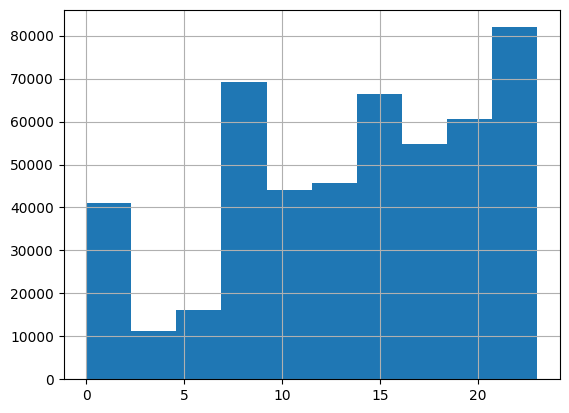

In [8]:
describe("pickup_hour")

count    491292.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: pickup_month, dtype: float64
{5}


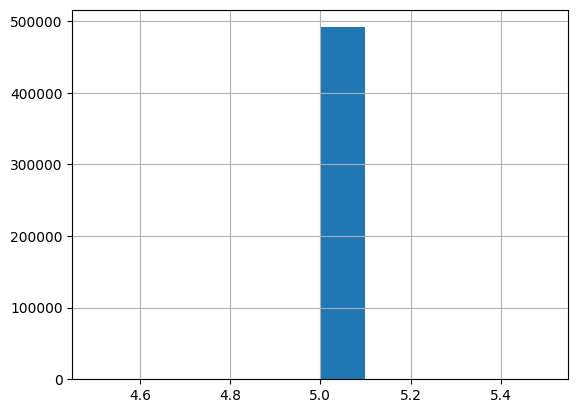

In [9]:
describe("pickup_month") # consider dropping the column, its just may, the information can be inferred from other columns anyways

count    491292.000000
mean         19.900013
std           1.278181
min          18.000000
25%          19.000000
50%          20.000000
75%          21.000000
max          22.000000
Name: pickup_week, dtype: float64
{18, 19, 20, 21, 22}


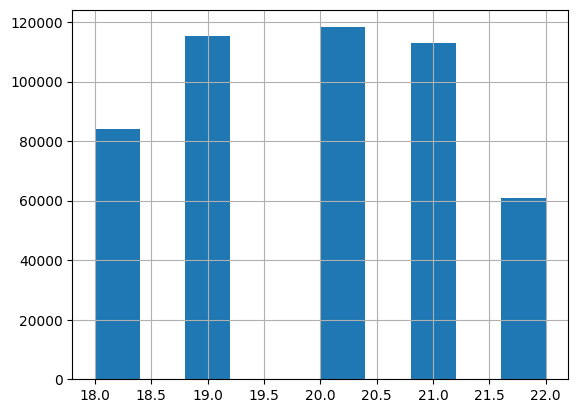

In [10]:
describe("pickup_week")


count    491292.000000
mean        136.342308
std           8.667126
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


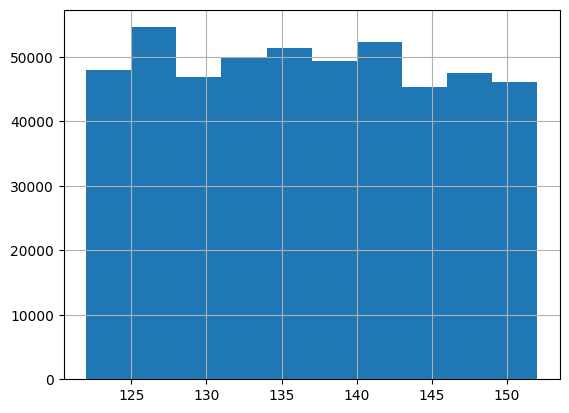

In [11]:
describe("pickup_day")

count    491292.000000
mean          3.916406
std           1.979211
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: pickup_wday, dtype: float64
{1, 2, 3, 4, 5, 6, 7}


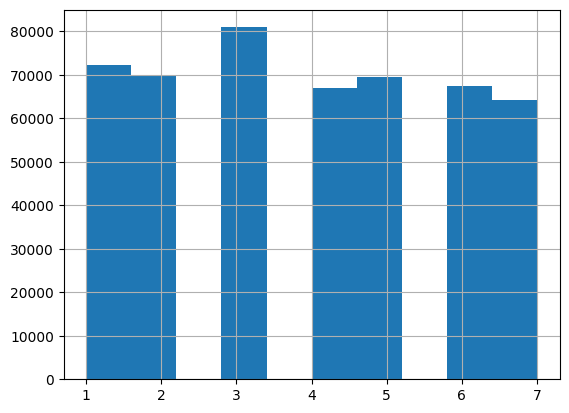

In [12]:
describe("pickup_wday")

## Creating a unified date column
**Add here code for column 'date'**

count    491292.000000
mean        985.000853
std        2694.842046
min           0.000000
25%         434.000000
50%         716.000000
75%        1157.000000
max       86393.000000
Name: length_time, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 1

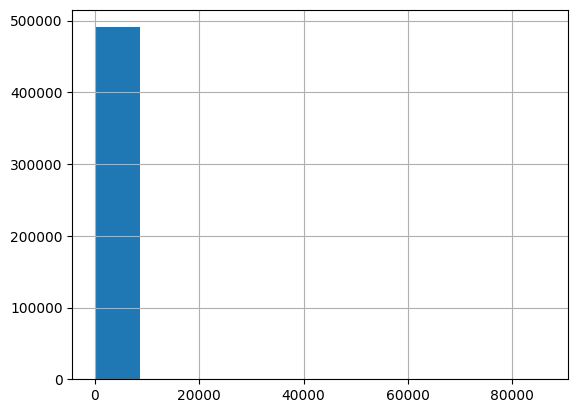

In [13]:
describe("length_time") ## investigate further: possible outliers in terms of time<60 and large time assuming we have time given in seconds

<Axes: >

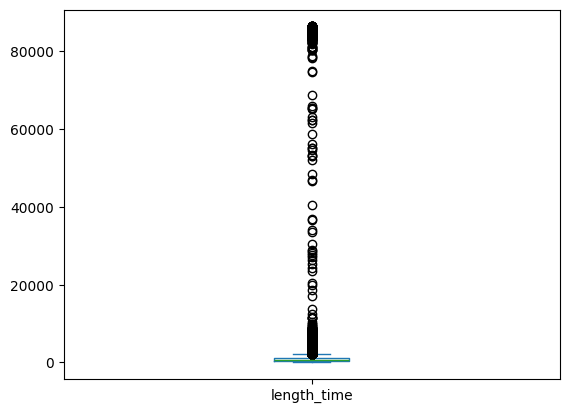

In [14]:
data["length_time"].plot.box() # a lot of outliers

In [15]:
data.loc[data["length_time"]<60] # ok, some of the are reasonable, somebody got an uver for like 0.2 km and that takes a minute. However I will remove all the trips with time or distance either 0

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
63,19,5,20,134,6,56,1,MN12,1,MN12,-73.972313,40.793957,-73.971474,40.794460,1,1,0.10,2.5,MN12-MN12
1704,13,5,19,129,1,54,1,MN31,1,MN32,-73.958122,40.773087,-73.955620,40.776546,2,4,0.32,3.0,MN31-MN32
2114,14,5,20,140,5,39,1,MN40,1,MN40,-73.970428,40.764606,-73.968750,40.766502,2,2,0.18,2.5,MN40-MN40
2966,15,5,19,128,7,3,1,MN23,1,MN23,-73.991661,40.730068,-73.991653,40.730076,1,1,0.00,2.5,MN23-MN23
3236,23,5,21,147,5,48,1,MN36,1,MN36,-73.942055,40.835396,-73.942062,40.835388,2,1,0.00,52.0,MN36-MN36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489431,2,5,19,133,5,29,1,MN17,1,MN17,-73.982063,40.759899,-73.985420,40.761311,2,1,0.20,2.5,MN17-MN17
489934,4,5,21,142,7,41,1,MN21,1,MN20,-73.983559,40.738342,-73.980431,40.742733,1,1,0.30,3.0,MN21-MN20
490178,0,5,20,139,4,27,3,BK28,3,BK28,-73.993050,40.619965,-73.993050,40.619965,1,1,0.00,14.0,BK28-BK28
490300,21,5,22,148,6,18,1,MN32,1,MN32,-73.953232,40.776356,-73.953232,40.776356,1,1,4.60,15.0,MN32-MN32


In [16]:
data = data.loc[data["length_time"]>=10] # a ride has to last at least 10 seconds
data = data.loc[data["trip_distance"]>=0.01]

0.80000     1300.0000
0.90000     1760.0000
0.95000     2267.0000
0.99000     3606.0000
0.99500     4271.0100
0.99900    19354.3020
0.99905    54708.0803
Name: length_time, dtype: float64


<Axes: >

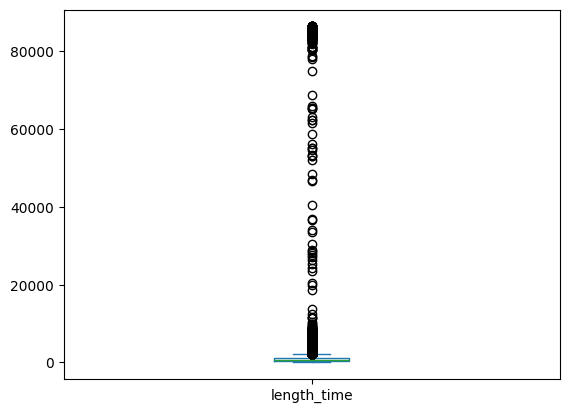

In [17]:
print(data["length_time"].quantile([0.8,0.9,0.95,0.99,0.995,0.999, 0.99905]))
data["length_time"].plot.box() #3600 seconds is an hour, what do we do with that many outliers? Where do we set the cutoff point? I propose 0.99 or 0.995

## Variable length_time
**To do:**
Discuss what are we doing with this variable, I(Loren) suggest we look at this at the end after we deal with all the other issues, because some of them may be solved over time

In [18]:
# cutting out data above 0.995 quantile
# data=data.loc[data["length_time"]<=4271.01]

<Axes: >

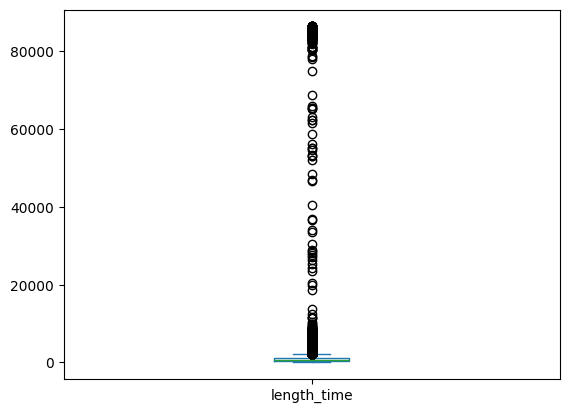

In [19]:
data["length_time"].plot.box() # now it looks much better 

count    490399.000000
mean          1.209403
std           0.739318
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: pickup_boro_code, dtype: float64
{1, 2, 3, 4, 5}


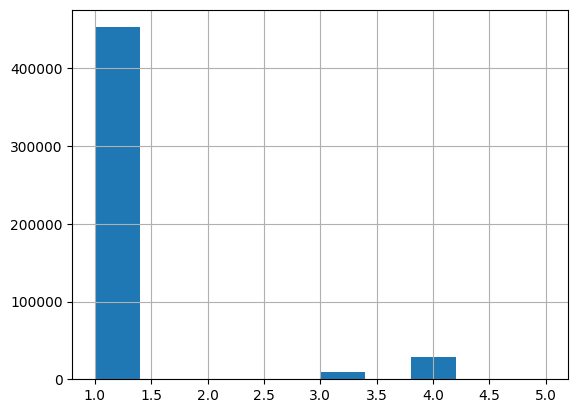

In [20]:
describe("pickup_boro_code") # The five boroughs of NYC: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island

count     490399
unique       153
top         MN17
freq       76213
Name: pickup_nta_code, dtype: object
{'QN54', 'BK17', 'MN32', 'BK63', 'BK75', 'MN36', 'QN19', 'QN27', 'MN03', 'BX10', 'BK90', 'BX26', 'MN50', 'BK81', 'BK35', 'BX08', 'MN01', 'BK77', 'BX35', 'BK50', 'MN28', 'BX46', 'QN37', 'QN49', 'MN13', 'QN38', 'QN47', 'QN20', 'QN30', 'QN51', 'BX75', 'BX39', 'BK64', 'QN57', 'QN28', 'QN18', 'QN48', 'QN63', 'SI35', 'BX52', 'BX49', 'BX63', 'SI37', 'BK45', 'BX22', 'QN01', 'BK21', 'MN34', 'BX30', 'BX34', 'BK82', 'QN34', 'QN17', 'BK32', 'BK34', 'MN19', 'BX29', 'QN53', 'MN31', 'BX01', 'BK96', 'QN31', 'MN09', 'MN17', 'BK33', 'BK61', 'BX41', 'BK58', 'BX37', 'BK43', 'BK38', 'BK83', 'BK85', 'BX28', 'QN76', 'QN70', 'QN99', 'BK78', 'QN02', 'BK28', 'BX13', 'BK93', 'QN21', 'BX36', 'MN23', 'QN56', 'BK44', 'BK95', 'QN42', 'MN25', 'MN22', 'BK41', 'BK42', 'BK69', 'MN24', 'BK60', 'QN06', 'QN29', 'MN21', 'QN52', 'QN98', 'QN35', 'BX40', 'QN61', 'QN60', 'BX43', 'QN71', 'MN14', 'SI22', 'BX06', 'BX17', 'BK30'

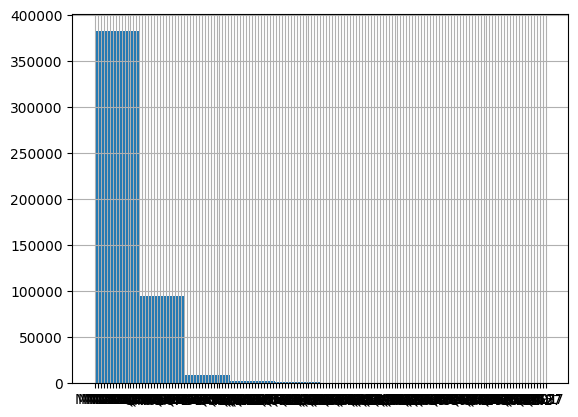

In [21]:
describe("pickup_nta_code")

count    490399.000000
mean          1.273957
std           0.789599
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: dropoff_boro_code, dtype: float64
{1, 2, 3, 4, 5}


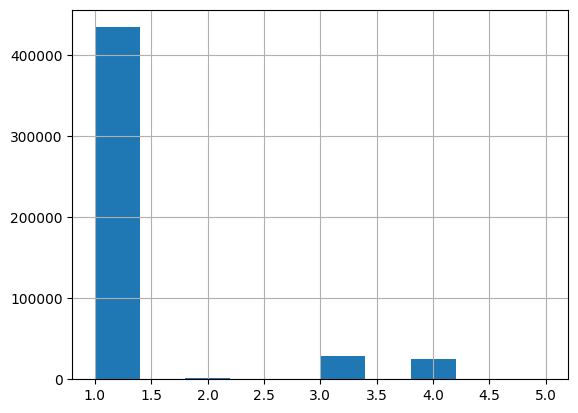

In [22]:
describe("dropoff_boro_code")

count     490399
unique       190
top         MN17
freq       70229
Name: dropoff_nta_code, dtype: object
{'QN54', 'BK17', 'MN32', 'BK63', 'BK75', 'MN36', 'SI25', 'QN19', 'QN27', 'MN03', 'BK29', 'BX10', 'SI05', 'BK90', 'BX26', 'BX07', 'MN50', 'BK81', 'BK35', 'BX08', 'MN01', 'BK77', 'BX35', 'BK50', 'MN28', 'BX46', 'QN37', 'BK26', 'QN49', 'MN13', 'QN12', 'QN38', 'BK23', 'QN47', 'QN20', 'QN30', 'QN51', 'SI08', 'BX75', 'BX39', 'BK64', 'QN57', 'QN62', 'QN18', 'QN28', 'QN48', 'QN63', 'SI35', 'BX52', 'BX49', 'BX63', 'SI37', 'BK45', 'BX22', 'QN01', 'BK46', 'BK21', 'QN33', 'MN34', 'BX30', 'BX34', 'BK82', 'QN34', 'QN17', 'BK32', 'BK34', 'MN19', 'BX29', 'QN53', 'MN31', 'QN66', 'QN43', 'BX01', 'BK96', 'QN31', 'MN09', 'SI54', 'MN17', 'BX55', 'BK33', 'BK61', 'BX41', 'BK58', 'BX37', 'SI12', 'BK43', 'BK38', 'BK85', 'BK83', 'BX28', 'QN76', 'QN70', 'QN99', 'BK78', 'QN15', 'QN02', 'BK28', 'BX13', 'BK93', 'QN05', 'QN21', 'BX36', 'MN23', 'QN56', 'BK44', 'BK95', 'QN42', 'MN25', 'MN22', 'BK41', 'BK42', 'BK69

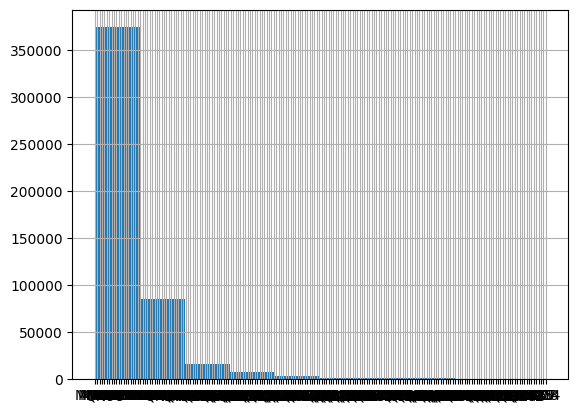

In [23]:
describe("dropoff_nta_code")

count    490399.000000
mean        -73.973989
std           0.037553
min         -74.104080
25%         -73.992378
50%         -73.981941
75%         -73.967674
max         -73.728279
Name: pickup_longitude, dtype: float64
{-73.9803466796875, -73.8631591796875, -73.9527359008789, -73.9566421508789, -73.9917984008789, -73.9722671508789, -73.9831771850586, -73.7901382446289, -73.9726791381836, -73.9804916381836, -73.960693359375, -73.976318359375, -73.988037109375, -73.941162109375, -73.9733581542969, -73.8639831542969, -74.0049133300781, -73.9577331542969, -73.9264831542969, -73.8796081542969, -73.97998046875, -73.87060546875, -73.99951171875, -73.95263671875, -73.96435546875, -73.86279296875, -73.97607421875, -73.95654296875, -73.98388671875, -73.9873046875, -73.7975921630859, -73.7807693481445, -73.9526443481445, -73.9213943481445, -73.8012313842773, -73.7864151000977, -73.9739151000977, -73.9270401000977, -73.9426651000977, -74.0136413574219, -73.9114151000977, -73.8645401000977, -73

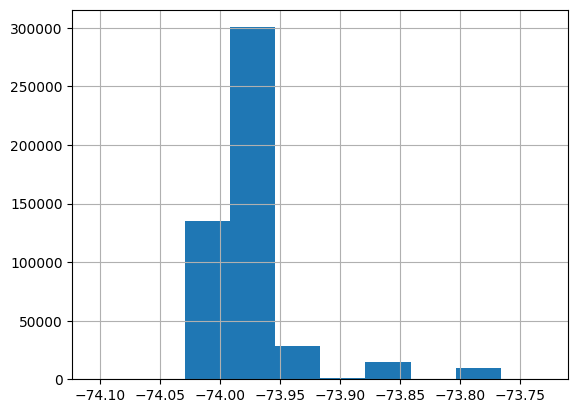

In [24]:
describe("pickup_longitude")

count    490399.000000
mean         40.750561
std           0.027529
min          40.575272
25%          40.736341
50%          40.753010
75%          40.768684
max          40.901421
Name: pickup_latitude, dtype: float64
{40.7859649658203, 40.7234649658203, 40.7836952209473, 40.7924118041992, 40.7129287719727, 40.7854080200195, 40.7193756103516, 40.771728515625, 40.7995491027832, 40.7682991027832, 40.7437744140625, 40.646728515625, 40.7253303527832, 40.7370491027832, 40.7604866027832, 40.7526741027832, 40.7643928527832, 40.7918548583984, 40.6457290649414, 40.7275352478027, 40.7900352478027, 40.7105522155762, 40.7169990539551, 40.7812118530273, 40.7251586914062, 40.7876586914062, 40.6626586914062, 40.8501586914062, 40.7081756591797, 40.6456756591797, 40.7146224975586, 40.7771224975586, 40.643856048584, 40.706356048584, 40.7753028869629, 40.7128028869629, 40.8378028869629, 40.7057991027832, 40.643482208252, 40.705982208252, 40.7261962890625, 40.7738037109375, 40.7742919921875, 40.641479

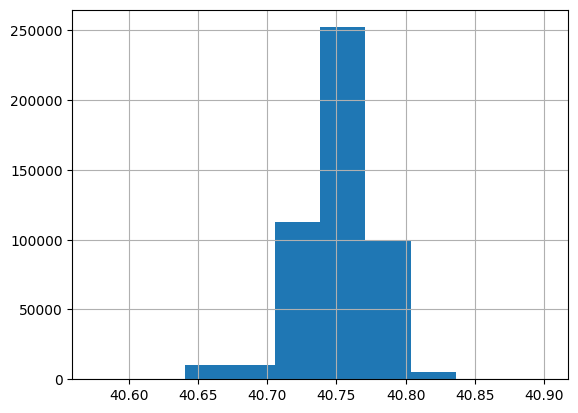

In [25]:
describe("pickup_latitude")

count    490399.000000
mean        -73.973592
std           0.033338
min         -74.242378
25%         -73.991577
50%         -73.979874
75%         -73.963356
max         -73.701439
Name: dropoff_longitude, dtype: float64
{-73.98291015625, -73.99853515625, -73.96728515625, -73.92041015625, -73.95166015625, -73.85791015625, -73.93603515625, -73.87353515625, -73.99658203125, -73.94970703125, -73.8276443481445, -73.953125, -73.890625, -73.9642181396484, -73.7767181396484, -74.1524276733398, -74.0098495483398, -74.0118026733398, -74.0215682983398, -74.0039901733398, -74.0157089233398, -74.0137557983398, -74.0020370483398, -74.0332870483398, -74.0176620483398, -73.957878112793, -73.9684143066406, -73.9522171020508, -73.9990921020508, -73.9209671020508, -73.7959671020508, -73.9053421020508, -73.8760452270508, -73.9971389770508, -73.9658889770508, -73.9815139770508, -73.9190139770508, -73.8365173339844, -73.9657135009766, -73.8407135009766, -73.9730911254883, -73.8480911254883, -73.92112731

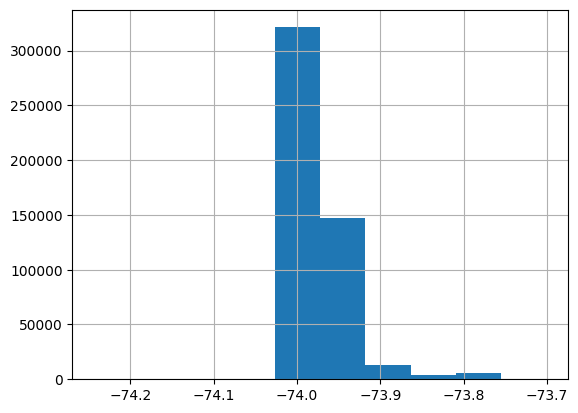

In [26]:
describe("dropoff_longitude")

count    490399.000000
mean         40.751100
std           0.031777
min          40.502365
25%          40.734585
50%          40.753639
75%          40.770145
max          40.911293
Name: dropoff_latitude, dtype: float64
{40.7147483825684, 40.6522483825684, 40.8397483825684, 40.7234649658203, 40.7836952209473, 40.7924118041992, 40.8549118041992, 40.7129287719727, 40.8379287719727, 40.7854080200195, 40.6568756103516, 40.771728515625, 40.7370491027832, 40.7526741027832, 40.7352294921875, 40.7136116027832, 40.7878303527832, 40.7253303527832, 40.7487678527832, 40.7598876953125, 40.7611083984375, 40.7039566040039, 40.7918548583984, 40.7123718261719, 40.7835884094238, 40.7813186645508, 40.6563186645508, 40.8438186645508, 40.6457290649414, 40.7900352478027, 40.7275352478027, 40.6650352478027, 40.6480522155762, 40.8355522155762, 40.7817687988281, 40.7087326049805, 40.7812118530273, 40.8501586914062, 40.7081756591797, 40.6456756591797, 40.7146224975586, 40.6608390808105, 40.7233390808105, 40.

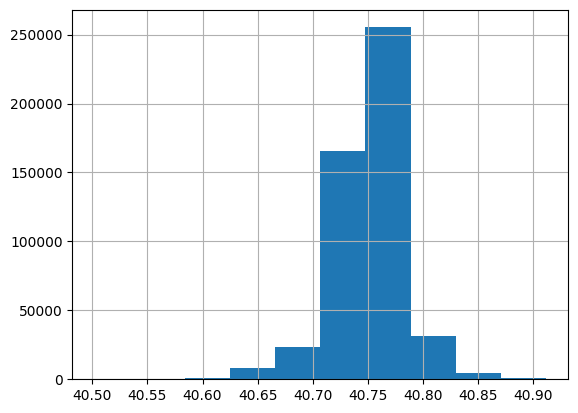

In [27]:
describe("dropoff_latitude")

count    490399.000000
mean          1.526318
std           0.499307
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


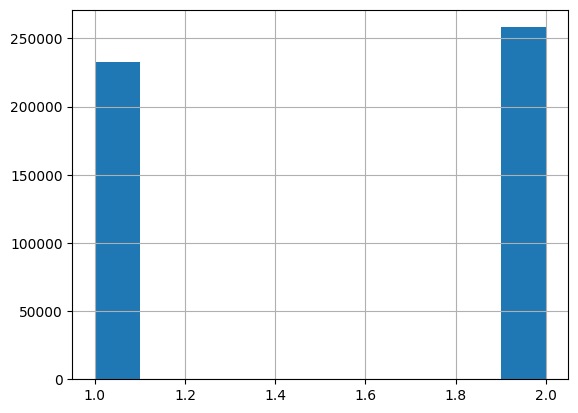

In [28]:
describe("vendor_id")

count    490399.000000
mean          1.641675
std           1.294019
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64
{0, 1, 2, 3, 4, 5, 6}


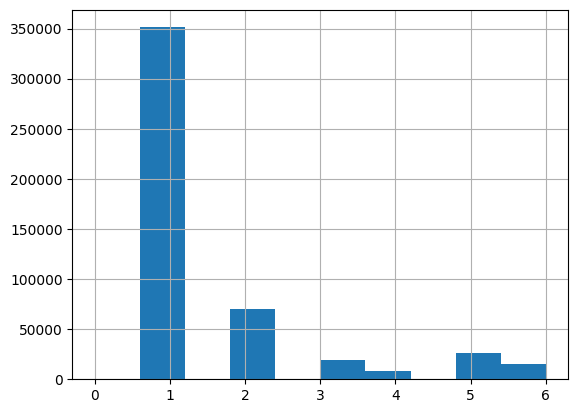

In [29]:
describe("passenger_count") 

In [30]:
data=data.loc[data["passenger_count"]>0] #There should not be any rides with 0 passengers

[1 2]
count    490391.000000
mean          1.526327
std           0.499307
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


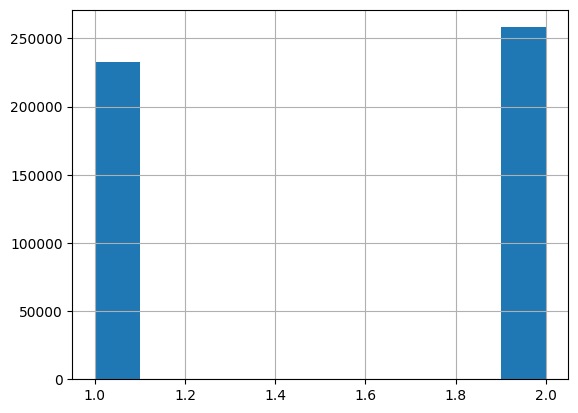

In [31]:
print(data["vendor_id"].unique())
describe("vendor_id")
# maybe we shuld delete this


## LM to identify outliers

In [32]:
df = data.loc[data["length_time"]<data["length_time"].quantile(0.995)]
df = df.loc[df["length_time"]>df["length_time"].quantile(0.005)]
df = df.loc[df["trip_distance"]<df["trip_distance"].quantile(0.995)]
df = df.loc[df["trip_distance"]>df["trip_distance"].quantile(0.005)]

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["trip_distance", "length_time"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.coef_#
#model.intercept_

data['predicted_fare'] = data['trip_distance']*model.coef_[0] + data['length_time']*model.coef_[1] + model.intercept_
data['pred_diff'] = data['predicted_fare'] - data['fare_amount']

In [34]:
data.sort_values(by='pred_diff', ascending=False)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
378485,4,5,22,149,7,1199,1,MN17,3,BK75,-73.990784,40.750755,-73.959198,40.688946,1,1,12000003.90,20.5,MN17-BK75,2.309967e+07,2.309965e+07
28049,1,5,19,129,1,1809,1,MN24,1,MN32,-74.004509,40.721439,-73.948387,40.782665,1,2,284000.00,27.5,MN24-MN32,5.467045e+05,5.466770e+05
360113,8,5,19,127,6,827,1,MN15,1,MN15,-74.000748,40.762074,-73.992355,40.755054,1,1,601.00,9.5,MN15-MN15,1.163905e+03,1.154405e+03
129409,10,5,19,127,6,86329,1,MN24,1,MN24,-73.996971,40.725273,-73.999947,40.725498,2,1,0.21,3.0,MN24-MN24,5.066874e+02,5.036874e+02
256251,9,5,18,126,5,86378,1,MN20,1,MN20,-73.978333,40.751968,-73.978302,40.751968,2,1,1.32,5.5,MN20-MN20,5.091102e+02,5.036102e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283759,19,5,18,123,2,15,2,BX08,2,BX08,-73.877922,40.835556,-73.877327,40.835926,2,1,0.13,90.0,BX08-BX08,2.505580e+00,-8.749442e+01
401846,14,5,19,133,5,232,4,QN99,4,QN98,-73.843056,40.762657,-73.864807,40.770351,2,1,2.16,100.0,QN99-QN98,7.680436e+00,-9.231956e+01
412853,22,5,19,129,1,120,1,MN04,1,MN04,-73.951202,40.825226,-73.949921,40.827423,1,1,0.20,110.0,MN04-MN04,3.253472e+00,-1.067465e+02
228773,1,5,22,148,6,49,1,MN17,1,MN17,-73.984886,40.750278,-73.984818,40.750408,1,1,1.50,150.0,MN17-MN17,5.341332e+00,-1.446587e+02


<Axes: >

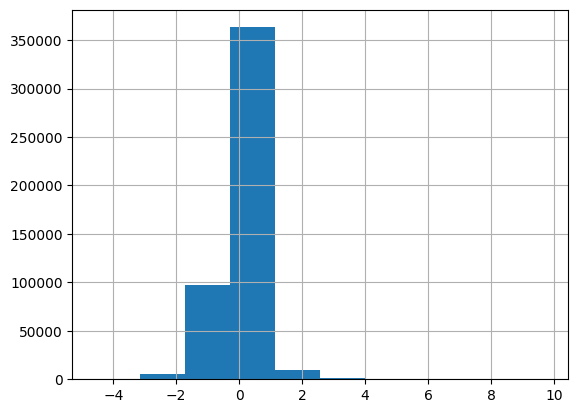

In [35]:
df = data.loc[data['pred_diff']<data['pred_diff'].quantile(0.995)]
df = df.loc[df['pred_diff']>df['pred_diff'].quantile(0.005)]
df = df.loc[df['fare_amount']!=52]
df['pred_diff'].hist()

Based on this we come up with threshold for which are outliers

## Checking if structural constraints are met

### Taxi Fare constraint

Link for taxi fares https://www.nytimes.com/2022/11/17/nyregion/taxi-fare-hike-nyc.html



#### JFK trips

Every ride from or to JFK costs $52. We should check that this is actually true for all data points. JFK's coordinates are 40.6446° N, 73.7797° W. Despite this we need to know the range of coordinates from which taxis start or end their trip which is still considered JFK according to fares.  
First I created a large rectangle with the coordinates which for sure includes all of JFK. Then, looking at the pickup trips that have fares which are exactly $52, the fare for the airport, I found the minimum and maximum lognitudes and latitudes of the JFK area. 

In [36]:
pickup_mask = (data["pickup_longitude"] > -73.79) &  (data["pickup_longitude"] < -73.76 ) &  (data["pickup_latitude"] > 40.5 ) &  (data["pickup_latitude"] <40.7  )
airport_pickup = data.loc[(data["fare_amount"] == 52) & (pickup_mask)]

JFK_min_long = min(airport_pickup["pickup_longitude"])
JFK_max_long = max(airport_pickup["pickup_longitude"])
JFK_min_lat = min(airport_pickup["pickup_latitude"])
JFK_max_lat = max(airport_pickup["pickup_latitude"])

airport_pickup_dropoff_mask =  ((data["pickup_longitude"] > JFK_min_long) & (data["pickup_longitude"] < JFK_max_long) &  (data["pickup_latitude"] > JFK_min_lat ) &  (data["pickup_latitude"] <JFK_max_lat)) |(data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
airport_pickup_mask =  (data["pickup_longitude"] > JFK_min_long) & (data["pickup_longitude"] < JFK_max_long) &  (data["pickup_latitude"] > JFK_min_lat )
airport_dropoff_mask = (data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
data.loc[ (data["fare_amount"] == 52) & (pickup_mask)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
27,13,5,19,130,2,3170,4,QN98,1,MN17,-73.786415,40.644684,-73.986954,40.761089,1,2,18.10,52.0,QN98-MN17,55.520829,3.520829
179,14,5,20,140,5,2925,4,QN98,1,MN19,-73.784149,40.648548,-73.970306,40.752476,1,1,16.80,52.0,QN98-MN19,51.587697,-0.412303
263,12,5,22,148,6,3105,4,QN98,1,MN20,-73.789886,40.646790,-73.978867,40.749298,2,1,16.29,52.0,QN98-MN20,51.657066,-0.342934
286,13,5,20,140,5,3882,4,QN98,1,MN23,-73.788612,40.642467,-74.007500,40.735443,2,1,19.62,52.0,QN98-MN23,62.604486,10.604486
295,14,5,21,143,1,3645,4,QN98,1,MN24,-73.789627,40.646843,-74.004372,40.721272,2,1,20.26,52.0,QN98-MN24,62.452514,10.452514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490801,17,5,19,127,6,3511,4,QN98,1,MN23,-73.789787,40.646782,-74.004440,40.733456,2,5,18.41,52.0,QN98-MN23,58.108829,6.108829
490832,17,5,21,141,6,3240,4,QN98,1,MN13,-73.783691,40.648670,-74.003304,40.751419,2,4,18.35,52.0,QN98-MN13,56.410835,4.410835
491024,17,5,18,123,2,3637,4,QN98,1,MN23,-73.781143,40.644955,-74.000572,40.735374,1,1,18.90,52.0,QN98-MN23,59.787838,7.787838
491140,14,5,19,128,7,3178,4,QN98,1,MN12,-73.781898,40.644741,-73.982727,40.781826,1,3,21.40,52.0,QN98-MN12,61.919949,9.919949


Rides that were from (and to if airport_pickup_dropoff_mask is used) but where the taxi fare isn't 52.

**To Discuss:**
What are we doing with these rows?


In [37]:
data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
43,21,5,20,135,7,2342,4,QN98,3,BK38,-73.788910,40.646790,-73.992203,40.687416,1,1,13.50,41.5,QN98-BK38,41.830884,0.330884
118,0,5,21,146,4,613,4,QN98,4,QN57,-73.777344,40.646648,-73.832695,40.661480,1,1,5.10,15.5,QN98-QN57,15.564688,0.064688
229,14,5,19,132,4,1502,4,QN98,3,BK96,-73.783882,40.648697,-73.928917,40.656311,2,1,10.42,32.0,QN98-BK96,30.996820,-1.003180
339,16,5,20,140,5,3059,4,QN98,4,QN31,-73.789696,40.646893,-73.942192,40.748848,2,1,14.81,48.0,QN98-QN31,48.539494,0.539494
985,13,5,21,146,4,2693,4,QN98,3,BK69,-73.789886,40.646946,-73.958755,40.686760,1,1,11.60,40.0,QN98-BK69,40.223092,0.223092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489926,1,5,20,140,5,1211,4,QN98,4,QN34,-73.776703,40.645386,-73.754005,40.718071,1,1,10.50,29.5,QN98-QN34,29.451533,-0.048467
490013,5,5,22,151,2,2508,4,QN98,3,BK34,-73.776787,40.645248,-73.997208,40.643608,2,1,21.46,60.0,QN98-BK34,58.123004,-1.876996
490064,12,5,18,126,5,600,4,QN98,4,QN98,-73.786171,40.649071,-73.786171,40.649071,2,1,1.26,8.0,QN98-QN98,8.096886,0.096886
490487,23,5,20,140,5,1742,4,QN98,3,BK75,-73.788071,40.641750,-73.952103,40.699600,2,5,17.92,48.5,QN98-BK75,46.835575,-1.664425


Rows that seems to be trips from and to airport with a very long trip time.  
**To discuss:**  
What should we do?

In [38]:
data.loc[(data["fare_amount"] == 52) & (airport_pickup_dropoff_mask) & (data["length_time"]>4271)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
565,15,5,21,141,6,4616,1,MN23,4,QN98,-73.993011,40.734360,-73.786461,40.647629,2,1,16.17,52.0,MN23-QN98,60.249505,8.249505
1271,15,5,18,125,4,4334,4,QN98,1,MN17,-73.782059,40.644611,-73.984238,40.759842,2,1,18.13,52.0,QN98-MN17,62.375719,10.375719
1319,14,5,19,133,5,4441,1,MN13,4,QN98,-73.991020,40.744656,-73.785637,40.643242,2,1,16.01,52.0,MN13-QN98,58.919603,6.919603
1452,18,5,20,135,7,6630,4,QN98,1,MN17,-73.783585,40.648708,-73.978004,40.764732,1,1,18.50,52.0,QN98-MN17,76.495376,24.495376
1819,12,5,20,134,6,5654,4,QN98,1,MN17,-73.782967,40.644257,-73.987610,40.757107,1,1,17.70,52.0,QN98-MN17,69.256078,17.256078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487976,13,5,19,127,6,4424,4,QN98,1,MN25,-73.788216,40.642075,-74.014740,40.716606,1,3,21.40,52.0,QN98-MN25,69.195926,17.195926
489235,17,5,21,143,1,86106,4,QN98,1,MN17,-73.783989,40.646225,-73.992165,40.749088,2,1,17.40,52.0,QN98-MN17,538.475433,486.475433
489440,16,5,21,147,5,5664,1,MN17,4,QN98,-73.982681,40.761711,-73.783157,40.648941,2,1,18.10,52.0,MN17-QN98,70.084462,18.084462
489514,17,5,20,137,2,5172,1,MN22,4,QN98,-73.984421,40.724899,-73.783272,40.643761,2,1,17.10,52.0,MN22-QN98,65.286472,13.286472


In [39]:
assert np.array_equal(data.loc[ (data["fare_amount"] == 52) & (airport_pickup_mask) ]["pickup_boro_code"].unique(), np.array([4]))
assert np.array_equal(data.loc[ (data["fare_amount"] == 52) & (airport_dropoff_mask) ]["dropoff_boro_code"].unique(), np.array([4]))


#### Minimum fare constraint
According to the article above, from 2012-2022, the base fair was $2.5 so no trip can be less than that.  
**To discuss:**  Should we delete these rows?

In [40]:
data.loc[ data["fare_amount"] < 2.5 ]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
393055,13,5,21,144,2,2276,1,MN99,4,QN98,-73.958427,40.800171,-73.78688,40.647285,1,1,18.0,0.01,MN99-QN98,50.107848,50.097848


# Checking column types

In [41]:
data.dtypes

pickup_hour            int64
pickup_month           int64
pickup_week            int64
pickup_day             int64
pickup_wday            int64
length_time            int64
pickup_boro_code       int64
pickup_nta_code       object
dropoff_boro_code      int64
dropoff_nta_code      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
vendor_id              int64
passenger_count        int64
trip_distance        float64
fare_amount          float64
pair                  object
predicted_fare       float64
pred_diff            float64
dtype: object

## BoroCode

BoroCode represents the 5 different Boroughs of New York. This means it is a categorical variable and not a numerical (continous) one. From  https://locatenyc.io/detail-bin we see that: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island, therefore we change the numbers of pickup_boro_code and dropoff_boro_code to their respective borough.

In [42]:
borough_mapping = {
    "1": "Manhattan",
    "2": "The Bronx",
    "3": "Brooklyn",
    "4": "Queens",
    "5": "Staten Island"}

# Apply mapping to the column
data['pickup_boro_code'] = data['pickup_boro_code'].astype(str).map(borough_mapping)
data['dropoff_boro_code'] = data['dropoff_boro_code'].astype(str).map(borough_mapping)
data.head()


,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
0,18,5,19,132,4,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.936739,-0.063261
1,7,5,21,146,4,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.214257,0.714257
2,18,5,19,127,6,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.674423,-0.325577
3,2,5,22,148,6,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.432384,0.432384
4,17,5,21,141,6,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.313015,1.813015


## pickup_day
Since all the dates are in the month of May, pickup_day can only have values of a certain range.
All of our data come from May 2015. Since 2015 is not a leap year, February has 28 days, and of course January, March, and May have 31 while April has 30. By adding up these values we find what day of the year the 1st and the 31st of May are. 

In [43]:
min_may = 31+28+31+30+1 #1st of May
max_may = 31+28+31+30+31 #31st of May
min_may, max_may

(121, 151)

count    490391.000000
mean        136.341784
std           8.666913
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


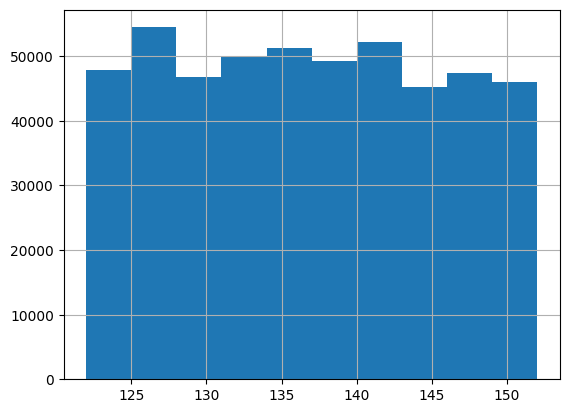

In [44]:
describe("pickup_day")

We see that the maximum pickup_day is 1 value higher than the day of the year that the 31st May is, which suggests that this variable is inflated by 1. This is also supported by the fact that otherwise there would be no rides on the 1st of may which woudl be surprising in such a large database. A reason behind these issue can be the fact that the day of the year is calculated as if the year was a leap year.

count    490391.000000
mean        135.341784
std           8.666913
min         121.000000
25%         128.000000
50%         135.000000
75%         143.000000
max         151.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 121, 122, 123, 124, 125, 126, 127}


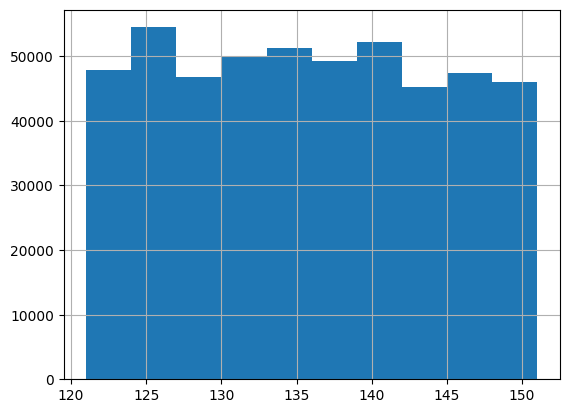

In [45]:
data["pickup_day"] = data["pickup_day"].apply(lambda x: x-1)
describe("pickup_day")

## Creating a date/time variable

The first 5 columns describe the time at which the ride took place with the accuracy to the closest hour at which ride initiated (we hypothesize here it may be different). 3 of them can be leveraged to obtain a datetime variable, reducing the neccesary size to store the same information, as we know the year is 2015. The week number and weekday can be deducted from the datetime variable, so we can also check their validity.

In [46]:
data['pickup_datetime'] = pd.to_datetime('2015' + '-' 
                                         + data['pickup_month'].astype(str) + '-' 
                                         + (data['pickup_day']).astype(str) + ' ' 
                                         + data['pickup_hour'].astype(str) + ':00:00', 
                                         format = '%Y-%m-%j %H:%M:%S')

data

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime
0,18,5,19,131,4,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.936739,-0.063261,2015-05-11 18:00:00
1,7,5,21,145,4,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.214257,0.714257,2015-05-25 07:00:00
2,18,5,19,126,6,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.674423,-0.325577,2015-05-06 18:00:00
3,2,5,22,147,6,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.432384,0.432384,2015-05-27 02:00:00
4,17,5,21,140,6,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.313015,1.813015,2015-05-20 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,23,5,21,140,6,193,Manhattan,MN14,Manhattan,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12,4.642239,0.142239,2015-05-20 23:00:00
491288,22,5,22,150,2,945,Manhattan,MN40,Manhattan,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,MN40-MN22,17.888385,-0.111615,2015-05-30 22:00:00
491289,19,5,19,131,4,764,Manhattan,MN20,Manhattan,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22,9.901546,-0.098454,2015-05-11 19:00:00
491290,21,5,20,139,5,955,Manhattan,MN13,Manhattan,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27,11.979370,-0.020630,2015-05-19 21:00:00


## pickup_week Check

As we now have the pickup_datetime we can check whether the week numbers are correctly assigned in the dataset, using built in python methods for the datetime object:

In [47]:
df = data.copy()

df['week_number'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
df['week_check'] = df['pickup_week'] - df['week_number']
df['week_check'].sum()

-136274

As we can see there are some issues with how week numbers are assigned

In [48]:
df.head()

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
0,18,5,19,131,4,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.936739,-0.063261,2015-05-11 18:00:00,20,-1
1,7,5,21,145,4,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.214257,0.714257,2015-05-25 07:00:00,22,-1
2,18,5,19,126,6,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.674423,-0.325577,2015-05-06 18:00:00,19,0
3,2,5,22,147,6,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.432384,0.432384,2015-05-27 02:00:00,22,0
4,17,5,21,140,6,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.313015,1.813015,2015-05-20 17:00:00,21,0


I will run a couple checks to see where dates do not align:

In [49]:
df.loc[df['pickup_datetime'] == '2015-05-01'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
284,0,5,18,121,1,1943,Manhattan,MN28,Queens,QN70,-73.990051,40.714031,-73.917686,40.766022,2,1,7.44,27.0,MN28-QN70,27.835612,0.835612,2015-05-01,18,0


In [50]:
df.loc[df['pickup_datetime'] == '2015-05-02'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
418,0,5,18,122,2,1101,Manhattan,MN17,Manhattan,MN34,-73.991478,40.749882,-73.94043,40.798035,1,1,5.0,17.5,MN17-MN34,18.221851,0.721851,2015-05-02,18,0


In [51]:
df.loc[df['pickup_datetime'] == '2015-05-03'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
1079,0,5,18,123,3,202,Brooklyn,BK75,Brooklyn,BK35,-73.950287,40.699749,-73.942368,40.696121,2,1,0.7,4.5,BK75-BK35,4.694794,0.194794,2015-05-03,18,0


In [52]:
df.loc[df['pickup_datetime'] == '2015-05-04'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
856,0,5,18,124,4,530,Manhattan,MN22,Manhattan,MN23,-73.990211,40.731918,-74.008438,40.73494,2,1,1.48,7.5,MN22-MN23,8.111617,0.611617,2015-05-04,19,-1


In [53]:
df.loc[df['pickup_datetime'] == '2015-05-05'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
1894,0,5,18,125,5,438,Manhattan,MN24,Manhattan,MN23,-74.005287,40.722267,-74.008774,40.738136,1,3,1.4,7.0,MN24-MN23,7.420388,0.420388,2015-05-05,19,-1


In [54]:
df.loc[df['pickup_datetime'] == '2015-05-06'].head(1)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,week_number,week_check
240,0,5,19,126,6,757,Manhattan,MN13,Manhattan,MN27,-73.996498,40.743023,-73.99157,40.72261,2,2,1.98,10.0,MN13-MN27,10.399661,0.399661,2015-05-06,19,0


It seems to be some issue where it thinks may had 5 days not 3 in the first week. After reviewing the original dataset, as well as actual calendar from May 2015, it seems that indeed some of the 'pickup_week' entries are wrong. They actually follow a path of weeks given dates from 2013. Therefore, we decided to get rid of pickup_week columns and use the 'week_number' created below. However, after deleting the column we change the name of 'week_number' back to the original, making sure it contains the correct values for every entry:

In [55]:
data['week_number'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
data.drop(columns=['pickup_week'], axis=1, inplace=True)
data.rename(columns={'week_number': 'pickup_week'}, inplace=True)

## pickup_wday CHECK BY KUBA

Same analysis can be performed for week days, given the datetime column. We check the validity of the 'pickup_wday' compared to actual weekdays in the calendar:

In [56]:
df = data.copy()

df['day'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
df['day_check'] = df['pickup_wday'] - df['day']
df['day_check'].sum()

-88350

Let's visualize what is the issue:

In [57]:
df.loc[df['pickup_datetime'] == '2015-05-01'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
284,1,2015-05-01,5


In [58]:
df.loc[df['pickup_datetime'] == '2015-05-02'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
418,2,2015-05-02,6


In [59]:
df.loc[df['pickup_datetime'] == '2015-05-03'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
1079,3,2015-05-03,7


In [60]:
df.loc[df['pickup_datetime'] == '2015-05-04'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
856,4,2015-05-04,1


It seems that the weekdays are just shifted. As in May 1st is weekday 1 - Monday - when actually its the 5th day in the calendar (confirmed with actual calendar as well). The following pattern continues for following days, with the 'pickup_wday' always being 4 days behind schedule. Kibnd of like using the calendar from May 2017 where the month indeed began on Monday. Therefore, we decide to clean using the same procedure as for week number:

In [61]:
data['weekday'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
data.drop(columns=['pickup_wday'], axis=1, inplace=True)
data.rename(columns={'weekday': 'pickup_wday'}, inplace=True)

In [62]:
data.loc[data['pickup_datetime'] == '2015-05-01'].head(1)

,pickup_hour,pickup_month,pickup_day,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,pickup_week,pickup_wday
284,0,5,121,1943,Manhattan,MN28,Queens,QN70,-73.990051,40.714031,-73.917686,40.766022,2,1,7.44,27.0,MN28-QN70,27.835612,0.835612,2015-05-01,18,5


## Delete redundant time related columns

Now that we have the datetime column containg the information about month/day/hour there is no point in keeping the other 3 variables in the dataset:

In [63]:
data.drop(columns=['pickup_month', 'pickup_hour', 'pickup_day'], axis=1, inplace=True)

# but then the code below will produce wrong results!!!

## pickup_wday
pickup_wday referes to the day of the week of the pickup. First we check that pickup_wday has in fact values from 1-7. Then we subtract one from each observation to change the variable to have values from 0-6, as it's more similar to how you count on python.

In [64]:
data["pickup_wday"].value_counts()
data["pickup_wday"] = data["pickup_wday"].apply(lambda x: x-1)

After seeing that that is true, I check how the value of pickup_wday was calculated so that I find out which day does 0 refer to (so whether 0 refers to Monday or any other day of week). I keep in mind that the original value of pickup_day is 1 more then in the current column, and calculate the weekday from that column by getting the modulo 7 of each observation and creating the auxillary variable, "aux_pickup_weekday", to compare against the pickup_wday variable.

In [65]:
data["aux_pickup_weekday"] = data["pickup_wday"].apply(lambda x: (x + 1) % 7) 
data["aux_pickup_weekday"].value_counts()

aux_pickup_weekday
0    80763
5    72153
6    69873
2    69448
3    67327
1    66826
4    64001
Name: count, dtype: int64

In [66]:
data

,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,pickup_week,pickup_wday,aux_pickup_weekday
0,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.936739,-0.063261,2015-05-11 18:00:00,20,0,1
1,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.214257,0.714257,2015-05-25 07:00:00,22,0,1
2,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.674423,-0.325577,2015-05-06 18:00:00,19,2,3
3,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.432384,0.432384,2015-05-27 02:00:00,22,2,3
4,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.313015,1.813015,2015-05-20 17:00:00,21,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,193,Manhattan,MN14,Manhattan,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12,4.642239,0.142239,2015-05-20 23:00:00,21,2,3
491288,945,Manhattan,MN40,Manhattan,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,MN40-MN22,17.888385,-0.111615,2015-05-30 22:00:00,22,5,6
491289,764,Manhattan,MN20,Manhattan,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22,9.901546,-0.098454,2015-05-11 19:00:00,20,0,1
491290,955,Manhattan,MN13,Manhattan,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27,11.979370,-0.020630,2015-05-19 21:00:00,21,1,2


I created this function to test whether the column aux_pickup_weekday was just shifting the days of pickup_wday by a certain number, which would results in a single unique value of the element-wise difference between the two columns, or if the pickup_wday column was calculated in a wrong way, which would not result in a unique value.

In [67]:
def custom_diff_columns_in_bases(df, column1, column2, base1):
    result = []
    for index, row in df.iterrows():
        value1 = int(str(row[column1]), base=base1)
        value2 = int(str(row[column2]), base=base1)
        if value2 >= value1:
            result.append(value2 - value1 )
        else:
            result.append((int(str(10), base1) + value2 - value1)) #we add 10(in base 7, means adding 7), so one more week in cases where value2 is in the next week
    return pd.Series(result, index=df.index)

base1 = 7 

result_series = custom_diff_columns_in_bases(data, 'pickup_wday', 'aux_pickup_weekday', base1)
result_series.unique()

array([1])

The above function shows that each value of the variable pickup_wday is calculated correctly, its just that pickup_wday has the values shifted by 3. So if Monday is represented by 0 on the calculated variable pickup_weekday, it's represented by 3 on pickup_wday. Tuesday by 4, Wednesday by 5 and so on. Below we encode the variable pickup_wday to the names of the days it represents.

In [68]:
day_mapping = {
    "3": "Monday",
    "4": "Tuesday",
    "5": "Wednesday",
    "6": "Thursday",
    "0": "Friday",
    "1": "Saturday",
    "2": "Sunday"
}

# Apply mapping to the column
data['pickup_wday'] = data['pickup_wday'].astype(str).map(day_mapping)
data["pickup_wday"].value_counts()

pickup_wday
Thursday     80763
Tuesday      72153
Wednesday    69873
Saturday     69448
Sunday       67327
Friday       66826
Monday       64001
Name: count, dtype: int64

Here, to double check that everything was done correctly, I calculated the day of week using the function ".weekday()" on the date variable. 

In [69]:
data["correct_day_of_week"] = data["pickup_datetime"].apply(lambda x: x.weekday())
day_mapping = {
    "0": "Monday",
    "1": "Tuesday",
    "2": "Wednesday",
    "3": "Thursday",
    "4": "Friday",
    "5": "Saturday",
    "6": "Sunday"}

data['correct_day_of_week'] = data['correct_day_of_week'].astype(str).map(day_mapping)
data['correct_day_of_week'].value_counts()

correct_day_of_week
Sunday       80763
Friday       72153
Saturday     69873
Tuesday      69448
Wednesday    67327
Monday       66826
Thursday     64001
Name: count, dtype: int64

#ASSERTION DOESNT WORK As it can be seen, the weekdays calculated from the information of the column pickup_wday and the weekdays calculated from the date have the same number of observations for each days, which most likely means the columns are identical. Despite this we recheck this, and then we remove both the auxilary variable aux_pickup_weekday and the variable correct_day_of_week.

In [70]:
#assert np.array_equal(np.array(data["pickup_wday"]), np.array(data["correct_day_of_week"]))
#data = data.drop(['correct_day_of_week', 'aux_pickup_weekday'], axis = 1)

In [71]:
data

,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,pickup_week,pickup_wday,aux_pickup_weekday,correct_day_of_week
0,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,6.936739,-0.063261,2015-05-11 18:00:00,20,Friday,1,Monday
1,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,13.214257,0.714257,2015-05-25 07:00:00,22,Friday,1,Monday
2,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,9.674423,-0.325577,2015-05-06 18:00:00,19,Sunday,3,Wednesday
3,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,12.432384,0.432384,2015-05-27 02:00:00,22,Sunday,3,Wednesday
4,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,39.313015,1.813015,2015-05-20 17:00:00,21,Sunday,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,193,Manhattan,MN14,Manhattan,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12,4.642239,0.142239,2015-05-20 23:00:00,21,Sunday,3,Wednesday
491288,945,Manhattan,MN40,Manhattan,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,MN40-MN22,17.888385,-0.111615,2015-05-30 22:00:00,22,Wednesday,6,Saturday
491289,764,Manhattan,MN20,Manhattan,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22,9.901546,-0.098454,2015-05-11 19:00:00,20,Friday,1,Monday
491290,955,Manhattan,MN13,Manhattan,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27,11.979370,-0.020630,2015-05-19 21:00:00,21,Saturday,2,Tuesday


Do these cells once everything works ok

In [72]:
#data.drop(['pickup_hour', 'pickup_month', 'pickup_day'], axis=1)

Enforce string type on nta codes

In [73]:
data.dtypes
data['pickup_nta_code']=data['pickup_nta_code'].map(str)
data['dropoff_nta_code']=data['dropoff_nta_code'].map(str)

Check if all Fares are inside of New York and the area around it

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

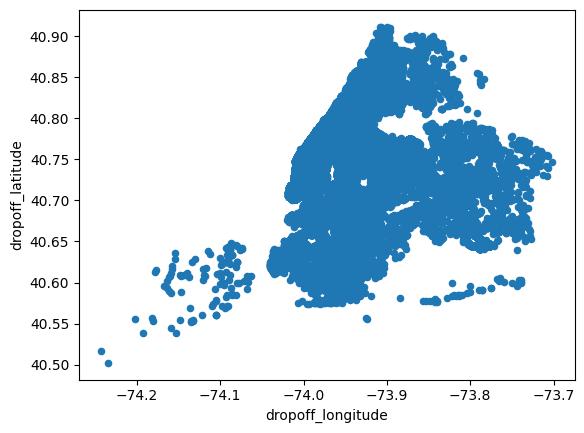

In [74]:
data.plot.scatter(x='dropoff_longitude',y='dropoff_latitude')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

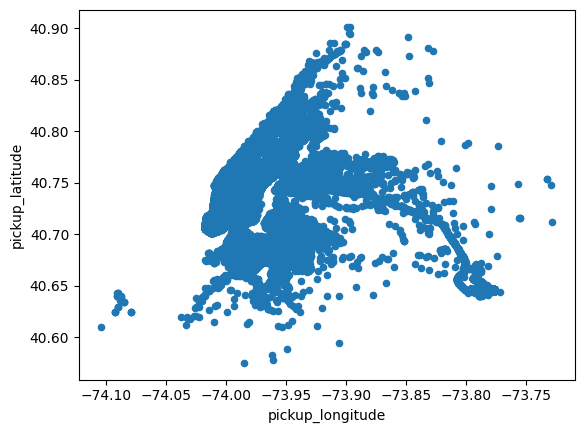

In [75]:
data.plot.scatter(x='pickup_longitude',y='pickup_latitude')

## Since NTA and borough codes are based entirely on longitude and lattitude, they should predict codes with above 99% accuracy

Pickup NTA only has 96.75% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [76]:
import sklearn as sklearn
from sklearn import tree
classifier = tree.ExtraTreeClassifier()
X = data[['pickup_longitude','pickup_latitude']]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,data['pickup_nta_code'])
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test) ## 97% accuracy means codes are generally correct: however we should investigate
print(classifier.score(X_test, Y_test)) 

0.9683844760925953


Pickup borough has 99.98% accuracy, the data should be entirely correct

In [77]:
classifier=tree.ExtraTreeClassifier()
X=data[['pickup_longitude','pickup_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['pickup_boro_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test) ## Perfect accuracy on Boro code
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code

0.9995840062643763


Dropoff NTA only has 96.25% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [78]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_nta_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test) ## 94% accuracy means codes are generally correct: howver we should investigate
print(classifier.score(X_test,Y_test)) 

0.9674709212222059


Dropoff borough code has 99.92% accuracy: we can assume no error in the data

In [79]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_boro_code'])
classifier.fit(X_train,Y_train)
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code


0.9995432225648053


## Checking the pair codes with the pickup and droppoff codes

In [80]:
first_code_data = data["pickup_nta_code"]
last_code_data = data["dropoff_nta_code"]
pair = data["pair"]

data_pair = first_code_data + "-" + last_code_data

list = data_pair == pair
all(list)

True

Check that first two letters of NTAcode correspond to the right borough.

In [81]:
data['first_two_letters_pickup'] = data['pickup_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_dropoff']= data['dropoff_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_pickup'].value_counts()

first_two_letters_pickup
MN    453010
QN     28049
BK      9138
BX       170
SI        24
Name: count, dtype: int64

In [82]:

nta_mapping = {
    "MN": "Manhattan",
    "BX": "The Bronx",
    "BK": "Brooklyn",
    "QN": "Queens",
    "SI": "Staten Island"}

# Apply mapping to the column
data['first_two_letters_pickup'] = data['first_two_letters_pickup'].astype(str).map(nta_mapping)
data['first_two_letters_dropoff'] = data['first_two_letters_dropoff'].astype(str).map(nta_mapping)
data.head()
assert np.array_equal(np.array(data['first_two_letters_pickup']), np.array(data['pickup_boro_code']))
assert np.array_equal(np.array(data['first_two_letters_dropoff']), np.array(data['dropoff_boro_code']))

In [83]:
(data['first_two_letters_pickup'].equals(data['pickup_boro_code']), data['first_two_letters_dropoff'].equals(data['dropoff_boro_code']))


(True, True)

Since these columns are identical, it means that the first two letters of NTA code match the borough so we can delete the auxillary columns. 

In [84]:
data.drop(['first_two_letters_pickup', 'first_two_letters_dropoff'], axis=1, inplace = True)